<a href="https://colab.research.google.com/github/gourav10/CS6140/blob/main/Assignment2_CS6140.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Question 8. Gradient Descent Implmentation**

In [247]:
import numpy as np
import matplotlib.pyplot as plt

In [248]:
def f(x):
  return np.power(x,4) + 4*np.power(x,3) -7*np.power(x,2) -10*x


Plot of f(x)

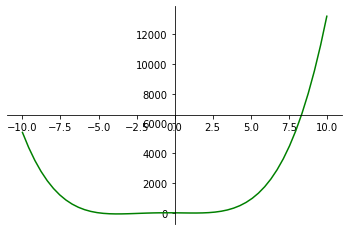

In [249]:
m = 50
theta1_true = 0.5
x = np.linspace(-10,10,m)
y = f(x)
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

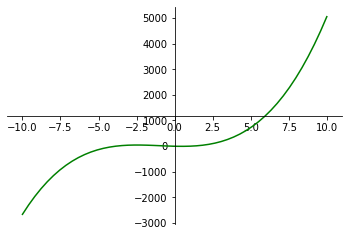

In [250]:
def grad_f(x):
  return 4*x*x*x + 12*x*x -14*x -10
  # return 4*x**3 + 12*x**2 -14*x -10

m = 50
theta1_true = 0.5
x = np.linspace(-10,10,m)
y = grad_f(x)
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

In [251]:
grad_f(2.1)

50.56400000000001

In [252]:
def grad_descent(x,learn_rate=(1/20),max_iterations=10000,threshold = 0.001):
  X_History = []
  Y_History = []
  vector = x
  X_History.append(vector)
  Y_History.append(f(vector))
  converge = False
  counter=1
  for i in range(max_iterations):
    grad = learn_rate*grad_f(vector)
    vector= vector - grad
    X_History.append(vector)
    Y_History.append(f(vector))
    counter+=1
    if(abs(grad_f(vector))<threshold):
      print("Convergence at {}".format(vector))
      converge = True
      break
  if(converge==False):
    print("No Convergence!")
  else:
    print("Iterations Completed: {}".format(counter))
    print("Values of X:\n{}".format(X_History))
    # plot the function
    plt.plot(X_History,Y_History, 'g')
    # show the plot
    plt.show()






Convergence at 1.276459562543907
Iterations Completed: 45
Values of X:
[2, -0.10000000000000009, 0.3241999999999998, 0.9812615663023998, 1.4014538046139455, 1.1535163577428298, 1.3556440453573875, 1.2036598081721204, 1.328171785721471, 1.230878151249827, 1.3104851409308178, 1.2472840415941344, 1.298868065150557, 1.2575875431869028, 1.2912013789397776, 1.2641832973260383, 1.2861426735867247, 1.268446840293649, 1.2828098138557351, 1.2712174451891318, 1.2806174808657258, 1.2730233368300254, 1.2791772483208634, 1.2742025406196622, 1.2782320108897698, 1.2749733788315583, 1.2776120640561803, 1.2754776171170596, 1.2772056527113365, 1.2758076047077493, 1.2769393099655264, 1.2760236181177058, 1.2767647981050652, 1.276165048317476, 1.2766504711292403, 1.2762576575800886, 1.2765755796045544, 1.276318303247984, 1.2765265237979189, 1.276358019359561, 1.2764943923017642, 1.2763840298031088, 1.2764733467570417, 1.2764010646412343, 1.276459562543907]


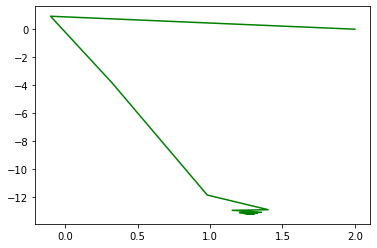

In [253]:
grad_descent(2,(1/20))

In [254]:
grad_descent(2,(1/14))

No Convergence!


Convergence at -3.7548004519984155
Iterations Completed: 15
Values of X:
[-6, -2.42, -2.79466848, -3.1500690460151706, -3.43151369692451, -3.6086777223730304, -3.6968310411686596, -3.7334560646258885, -3.747203122311591, -3.7521365200567964, -3.753876616572992, -3.754486545720146, -3.7546998611534232, -3.754774407634726, -3.7548004519984155]


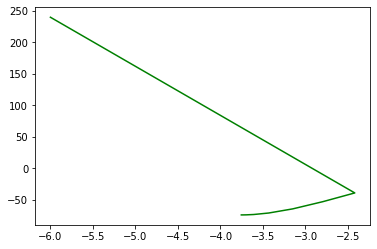

In [255]:
grad_descent(-6,(1/100))

In [256]:
grad_descent(2,(1/3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


No Convergence!


#Q9 Regression Implementation

In [257]:
def predict(X,theta):
  return np.dot(X,theta)

def getThetaClosedForm(X,Y):
  Y = np.mat(Y)
  first = np.dot(X.T,X)
  second = np.dot(X.T,Y)

  theta = np.linalg.pinv(first)*second
  return theta

In [258]:
#{(0.10, 0.65),(0.50, 0.10),(0.90, 0.35),(−0.20, 0.17),(−0.5, 0.42),(1.50, 2.62)}
X = np.array([0.10,0.50,0.90,-0.20,-0.5,1.50])
X = X.reshape((-1,1))
Y = np.array([0.65,0.10,0.35,0.17,0.42,2.62])
Y = Y.reshape((-1,1))
ones = np.zeros((X.shape[0],1))
X_New = np.hstack((X,ones))
print(X_New.shape)
print(Y.shape)
theta = getThetaClosedForm(X_New,Y)
print(theta)

(6, 2)
(6, 1)
[[1.1401662]
 [0.       ]]


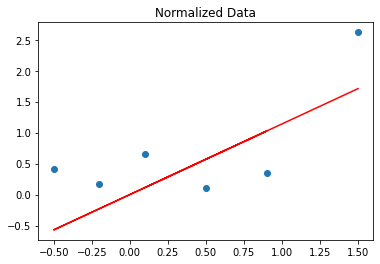

In [259]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X,predict(X_New,theta),c='red')
plt.title("Normalized Data")
plt.show()

In [260]:
X = np.array([0.10,0.50,0.90,-0.20,-0.5])
X = X.reshape((-1,1))
Y = np.array([0.65,0.10,0.35,0.17,0.42])
Y = Y.reshape((-1,1))
ones = np.zeros((X.shape[0],1))
X_New = np.hstack((X,ones))
print(X_New.shape)
print(Y.shape)
theta = getThetaClosedForm(X_New,Y)
print(theta)

(5, 2)
(5, 1)
[[0.13676471]
 [0.        ]]


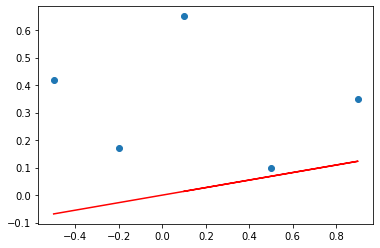

In [261]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X,predict(X_New,theta),c='red')
plt.show()

# Question 10: Logistic Regression Implementation


In [262]:
import scipy.io as sio
import seaborn as sns
import pandas as pd
test = sio.loadmat('/content/gdrive/MyDrive/CS6140/hw02_dataset.mat')

In [263]:
test.keys()
test['X_tst'][:5]
test['Y_tst'][:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

In [264]:
def generateDataFrame(dataDict):
  tempDict = {'X1':[],'X2':[],'target':[]}
  for key in dataDict:
    if(key=='X_trn'):
      for values in dataDict[key]:
        tempDict['X1'].append(values[0])
        tempDict['X2'].append(values[1])
    elif(key=='Y_trn'):
      for val in dataDict[key]:
        tempDict['target'].append(val[0])
  return tempDict

def generateTestDataFrame(dataDict):
  tempDict = {'X1':[],'X2':[],'target':[]}
  for key in dataDict:
    if(key=='X_tst'):
      for values in dataDict[key]:
        tempDict['X1'].append(values[0])
        tempDict['X2'].append(values[1])
    elif(key=='Y_tst'):
      for val in dataDict[key]:
        tempDict['target'].append(val[0])
  return tempDict

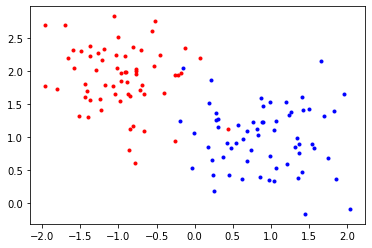

In [265]:
t = generateDataFrame(test)
df_train = pd.DataFrame(data = t)
df_train.head()

df0 = df_train[df_train.target==0]
df1 = df_train[df_train.target==1]

plt.scatter(df0['X1'],df0['X2'],color='red',marker='.')
plt.scatter(df1['X1'],df1['X2'],color='blue',marker='.')

testDf_Dict = generateTestDataFrame(test)
df_test = pd.DataFrame(data=testDf_Dict)

In [266]:
from sklearn.model_selection import train_test_split

strain,stest  = train_test_split(df_train,test_size=0.2)

In [267]:
len(strain)

100

In [268]:
len(stest)

26

In [269]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [270]:
model.fit(strain[['X1','X2']],strain['target'])

LogisticRegression()

In [271]:
model.score(stest[['X1','X2']],stest['target'])

1.0

In [272]:
#Retrieve Model parameters.
b = model.intercept_[0]

#Calculate the intercept and gradient of decision boundary
w1,w2 = model.coef_.T

In [273]:
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

In [274]:
# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c

Text(0.5, 0, '$x_1$')

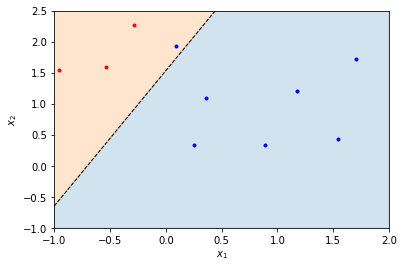

In [275]:
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

df0 = df_test[df_test.target==0]
df1 = df_test[df_test.target==1]

plt.scatter(df0['X1'],df0['X2'],color='red',marker='.')
plt.scatter(df1['X1'],df1['X2'],color='blue',marker='.')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')